In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import torch
import torchvision.transforms as TT
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from pathlib import Path

In [56]:
from dataloader import NoseKeypointDataset
from data_augment import Rescale, RandomCrop
from learn import train, test
import cnn
from display import show_keypoints

In [100]:
# Initialite Datasets and Dataloaders

ROOT_DIR = Path("imm_face_db")

#part1_transform = TT.Compose([Rescale((60, 80))])
part1_transform = Rescale(240, 320)

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(idxs=np.arange(32), root_dir=ROOT_DIR, transform=True)
train_loader=DataLoader(training_set,batch_size=16, shuffle=True)

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(idxs=np.arange(32, 40), root_dir=ROOT_DIR, transform=True)
test_loader=DataLoader(validation_set,batch_size=1, shuffle=False)

image.shape = (240, 320)


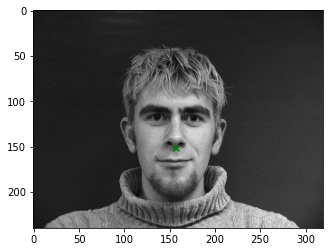

In [102]:
sample = training_set[0]
image, points = sample
show_keypoints(image, points)

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 0 =====
0 0.3911108374595642
100%|██████████| 12/12 [00:08<00:00,  1.43it/s]11 0.006855504121631384

  0%|          | 0/48 [00:00<?, ?it/s]image.shape = (240, 320)


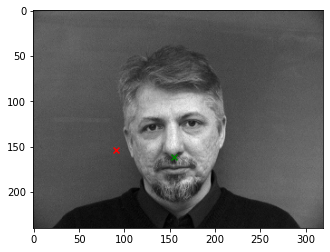

 23%|██▎       | 11/48 [00:00<00:05,  6.89it/s]image.shape = (240, 320)


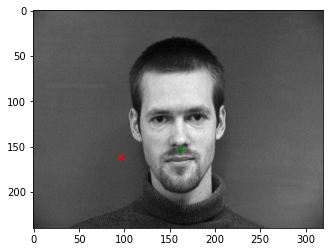

 46%|████▌     | 22/48 [00:01<00:02, 11.90it/s]image.shape = (240, 320)


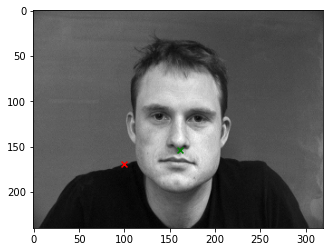

 73%|███████▎  | 35/48 [00:02<00:00, 18.05it/s]image.shape = (240, 320)


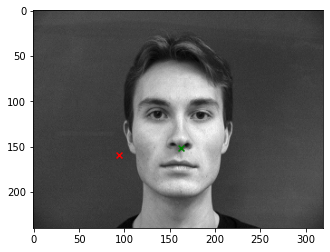

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 1 =====
0 0.38961172103881836
  0%|          | 0/48 [00:00<?, ?it/s]11 0.018693430349230766
image.shape = (240, 320)


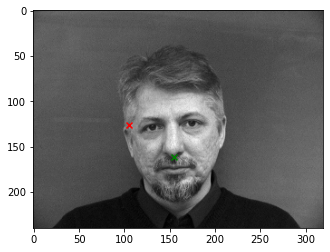

 25%|██▌       | 12/48 [00:00<00:05,  6.33it/s]image.shape = (240, 320)


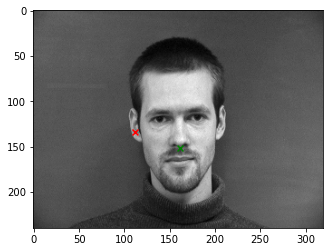

 46%|████▌     | 22/48 [00:01<00:02, 11.04it/s]image.shape = (240, 320)


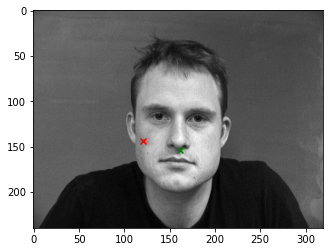

 75%|███████▌  | 36/48 [00:02<00:00, 17.58it/s]image.shape = (240, 320)


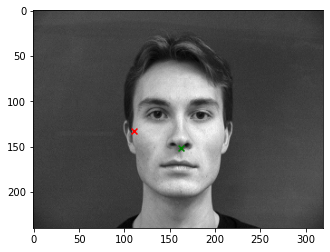

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 2 =====
0 0.3237378001213074
  0%|          | 0/48 [00:00<?, ?it/s]11 0.03147326782345772
image.shape = (240, 320)


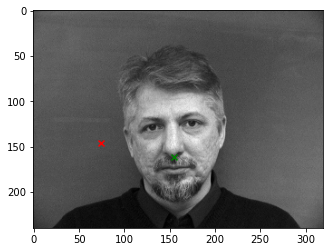

 25%|██▌       | 12/48 [00:00<00:06,  5.82it/s]image.shape = (240, 320)


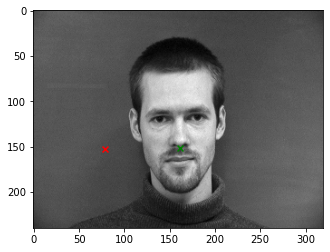

 44%|████▍     | 21/48 [00:01<00:02,  9.45it/s]image.shape = (240, 320)


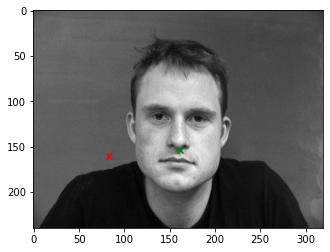

 69%|██████▉   | 33/48 [00:02<00:01, 14.79it/s]image.shape = (240, 320)


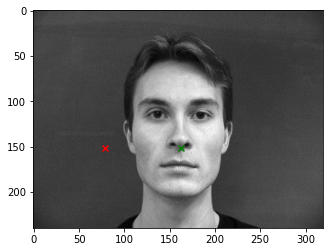

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 3 =====
0 0.3025227189064026
100%|██████████| 12/12 [00:08<00:00,  1.40it/s]11 0.026463881134986877

  0%|          | 0/48 [00:00<?, ?it/s]image.shape = (240, 320)


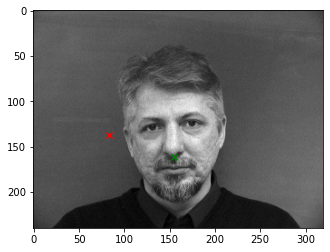

 25%|██▌       | 12/48 [00:00<00:05,  6.06it/s]image.shape = (240, 320)


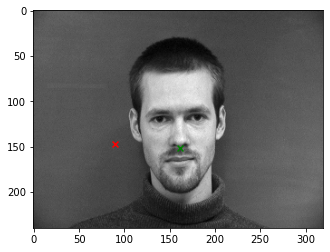

 50%|█████     | 24/48 [00:01<00:02, 11.61it/s]image.shape = (240, 320)


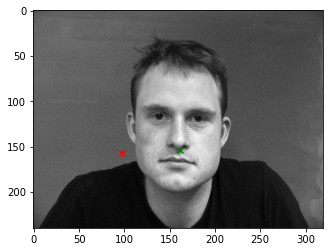

 71%|███████   | 34/48 [00:02<00:01, 13.90it/s]image.shape = (240, 320)


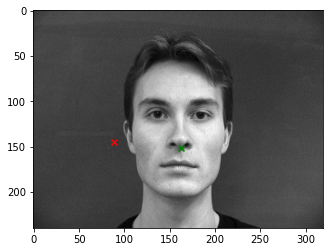

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 4 =====
0 0.3228508234024048
  0%|          | 0/48 [00:00<?, ?it/s]11 0.03183360770344734
image.shape = (240, 320)


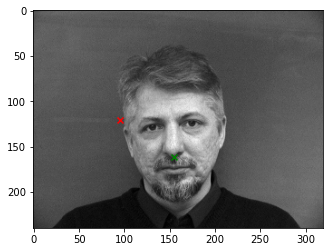

 25%|██▌       | 12/48 [00:00<00:06,  5.99it/s]image.shape = (240, 320)


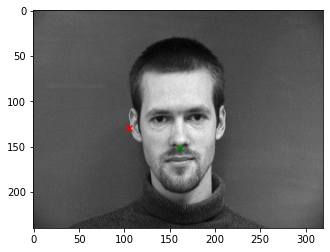

 46%|████▌     | 22/48 [00:01<00:02,  9.45it/s]image.shape = (240, 320)


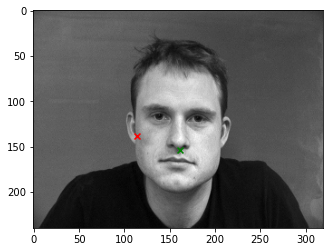

 75%|███████▌  | 36/48 [00:02<00:00, 15.31it/s]image.shape = (240, 320)


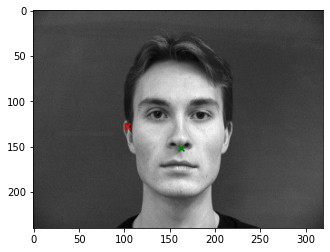

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 5 =====
0 0.4110649526119232
  0%|          | 0/48 [00:00<?, ?it/s]11 0.009271269664168358
image.shape = (240, 320)


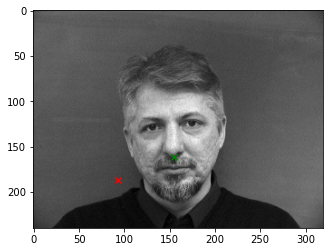

 19%|█▉        | 9/48 [00:00<00:08,  4.77it/s]image.shape = (240, 320)


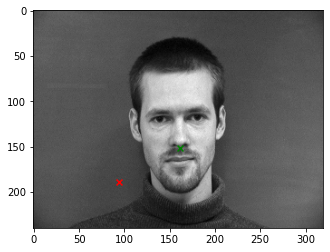

 50%|█████     | 24/48 [00:01<00:02, 11.71it/s]image.shape = (240, 320)


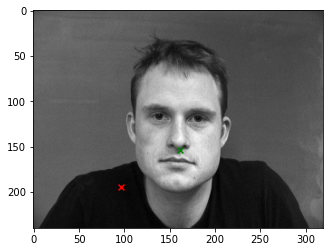

 71%|███████   | 34/48 [00:02<00:01, 14.00it/s]image.shape = (240, 320)


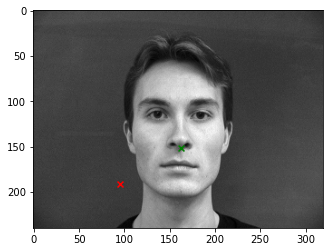

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 6 =====
0 0.3197190463542938
  0%|          | 0/48 [00:00<?, ?it/s]11 0.02056216634809971
image.shape = (240, 320)


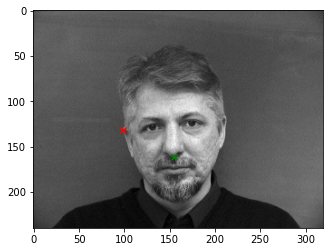

 23%|██▎       | 11/48 [00:00<00:07,  5.11it/s]image.shape = (240, 320)


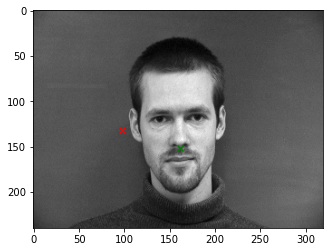

 48%|████▊     | 23/48 [00:01<00:02, 10.06it/s]image.shape = (240, 320)


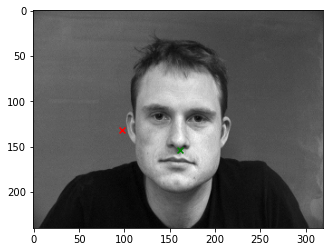

 71%|███████   | 34/48 [00:02<00:01, 12.99it/s]image.shape = (240, 320)


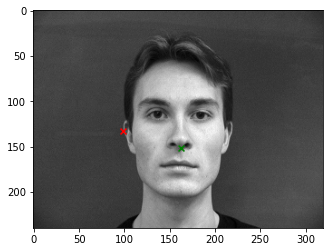

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 7 =====
0 0.4193339943885803
  0%|          | 0/48 [00:00<?, ?it/s]11 0.009202375076711178
image.shape = (240, 320)


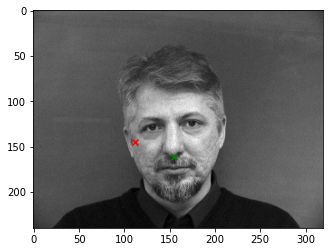

 25%|██▌       | 12/48 [00:00<00:05,  6.92it/s]image.shape = (240, 320)


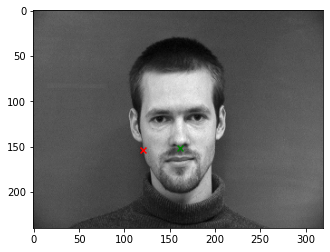

 46%|████▌     | 22/48 [00:01<00:02, 10.49it/s]image.shape = (240, 320)


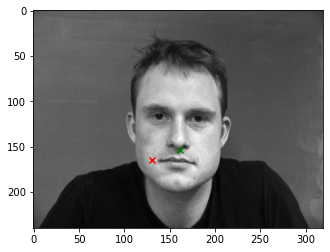

 69%|██████▉   | 33/48 [00:02<00:01, 14.05it/s]image.shape = (240, 320)


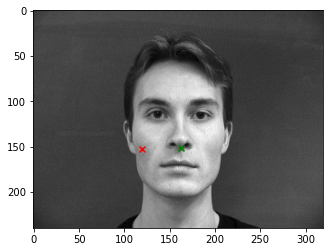

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 8 =====
0 0.28975486755371094
  0%|          | 0/48 [00:00<?, ?it/s]image.shape = (240, 320)


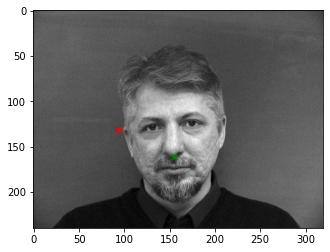

 25%|██▌       | 12/48 [00:00<00:05,  6.42it/s]image.shape = (240, 320)


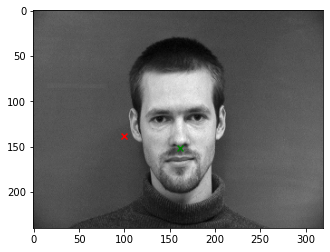

 46%|████▌     | 22/48 [00:01<00:02, 10.40it/s]image.shape = (240, 320)


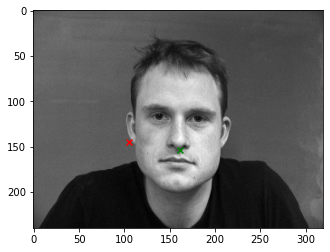

 75%|███████▌  | 36/48 [00:02<00:00, 16.28it/s]image.shape = (240, 320)


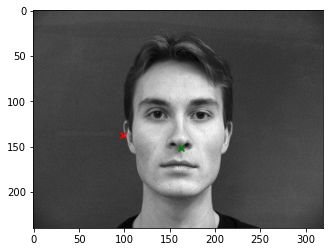

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 9 =====
0 0.327574223279953
  0%|          | 0/48 [00:00<?, ?it/s]image.shape = (240, 320)


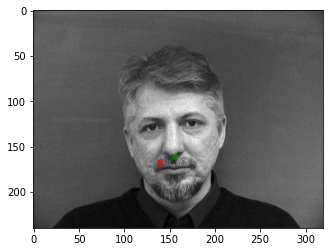

 19%|█▉        | 9/48 [00:00<00:08,  4.53it/s]image.shape = (240, 320)


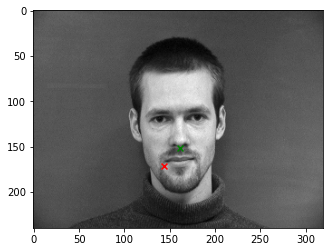

 48%|████▊     | 23/48 [00:01<00:02, 10.98it/s]image.shape = (240, 320)


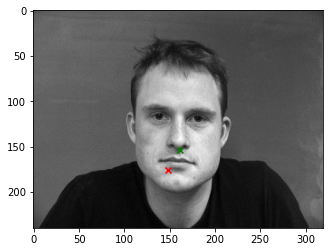

 71%|███████   | 34/48 [00:02<00:01, 13.20it/s]image.shape = (240, 320)


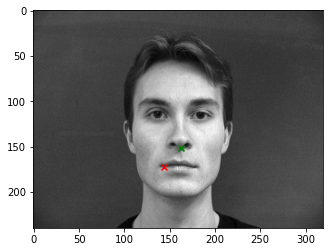

100%|██████████| 48/48 [00:03<00:00, 14.63it/s]


In [99]:
# train
epochs = 10
for ep in range(epochs):
    print(f"===== Epoch {ep} =====")
    trained_model = train(train_loader, model=cnn.NoseFinder(), learning_rate=1e-3)
    test(test_loader, trained_model, show_every=12)